<a href="https://colab.research.google.com/github/okanars/PCAonIrisSpecies/blob/main/PCAonIrisSpecies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df_new = df.drop(['Id'],axis=1)
df_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
x=df_new[features]
y=df_new[['Species']]
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [6]:
# We have to scaling the values because every feature has different dimensions and it must be equai weighted.
#Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [7]:
#Now we should reduce the features from 4 dimensions to 2 dimensions
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns=['principal component1','principal component2'])
principalDf

,principal component1,principal component2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [8]:
#Now we add the Species Column to PCA Dataframe
final_df=pd.concat([principalDf,df[['Species']]],axis=1)
final_df

,principal component1,principal component2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


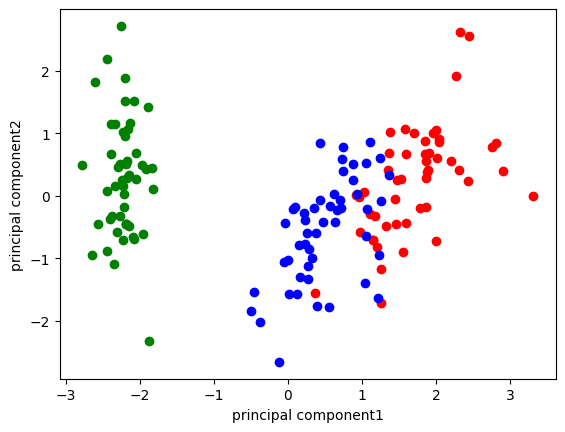

In [9]:
dfsetosa = final_df[df.Species=='Iris-setosa']
dfvirginica = final_df[df.Species=='Iris-virginica']
dfversicolor = final_df[df.Species=='Iris-versicolor']
plt.xlabel('principal component1')
plt.ylabel('principal component2')

plt.scatter(dfsetosa['principal component1'],dfsetosa['principal component2'],color='green')
plt.scatter(dfvirginica['principal component1'],dfvirginica['principal component2'],color='red')
plt.scatter(dfversicolor['principal component1'],dfversicolor['principal component2'],color='blue')

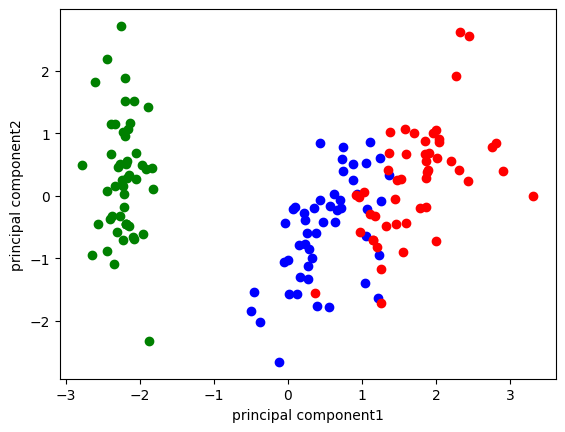

In [10]:
#For more professional Plotting:
Speciess = ['Iris-setosa','Iris-versicolor','Iris-virginica']
colors = ['g','b','r']
plt.xlabel('principal component1')
plt.ylabel('principal component2')
for Species, col in zip(Speciess,colors):
    dftemp = final_df[df.Species==Species]
    plt.scatter(dftemp['principal component1'],dftemp['principal component2'], color=col)

In [11]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [12]:
pca.explained_variance_ratio_.sum()

0.9580097536148197